# Function isolines

## Synopse

Isolines of a grayscale image.

- **g = isolines(f, nc=10, np=1)**

  - **g**: Image.

  - **f**: Image. Input image.
  - **nc**: Double. Number of colors.
  - **n**: Double. Number of pixels by isoline.

## Description

Shows lines where the pixels have same intensity with a unique color.

In [6]:
import numpy as np
def isolines(f, nc=10, n=1):
    from colormap import colormap
    from applylut import applylut
    
    maxi = int(np.ceil(f.max()))
    mini = int(np.floor(f.min()))
    d = int(np.ceil(1.*(maxi-mini)/nc))
    m = np.zeros((d,1))
    m[0:n,:] = 1
    m = np.resize(m, (maxi-mini, 1))
    m = np.concatenate((np.zeros((mini,1)), m))
    m = np.concatenate((m, np.zeros((256-maxi,1))))
    m = np.concatenate((m,m,m), 1)
    ct = m*colormap('hsv') + (1-m)*colormap('gray')
    g = applylut(f, ct)
    return g

## Examples

In [1]:
testing = (__name__ == "__main__")
if testing:
    ! jupyter nbconvert --to python isolines.ipynb
    import numpy as np
    import sys,os
    ia898path = os.path.abspath('../../')
    if ia898path not in sys.path:
        sys.path.append(ia898path)
    import ia898.src as ia

[NbConvertApp] Converting notebook isolines.ipynb to python
[NbConvertApp] Writing 1470 bytes to isolines.py


### Example 1

""
""

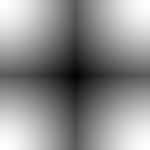

""
""

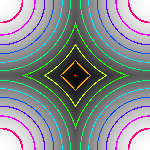

In [2]:
if testing:
    f = ia.normalize(ia.bwlp([150,150], 4, 1), [0,255])
    f = f.astype('uint8')
    g = ia.isolines(f, 10, 3)
    g = g.astype('uint8')

    ia.adshow(f)
    ia.adshow(g)